In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sympy import (symbols, simplify)
from sympy.physics.mechanics import dynamicsymbols, init_vprinting
from sympy.physics.mechanics import Lagrangian, ReferenceFrame, Point, Particle,inertia, RigidBody, angular_momentum

In [3]:
from optibot.symbolic import lagrange, diff_to_symb, SimpLagrangesMethod
from optibot.numpy import unpack

In [4]:
init_vprinting()

In [5]:
from optibot.robots import Panda_Simp

In [6]:
panda = Panda_Simp()

In [7]:
plt.style.use('default')

In [8]:
from optibot.opti import Opti_Problem
import time

#### Warning: next cell can take several minutes to run (the first time)

In [9]:
N = 15
verbose = True
silent = False
ini_guess = 'lin'
t_end = 5
params = []
scheme = 'trapz'

_opti = Opti_Problem(
    LM=panda,
    params = params,
    scheme = scheme,
    ini_guess= ini_guess,
    t_end = t_end,
    verbose=verbose,
    silent=silent,
)
_opti.dynamic_setup()
_opti.opti_setup(N)

Dynamics detected: Implicit Lagranges Method
Generating F function
x vars expected: [x_0, x_1, x_2, x_3, x_4, x_5, x_6, x_7, x_8, x_9, x_10, x_11, x_12, x_13, x_0_dot, x_1_dot, x_2_dot, x_3_dot, x_4_dot, x_5_dot, x_6_dot, x_7_dot, x_8_dot, x_9_dot, x_10_dot, x_11_dot, x_12_dot, x_13_dot]
x vars found: [x_0_dot, x_1, x_10, x_10_dot, x_11, x_11_dot, x_12, x_12_dot, x_13, x_13_dot, x_1_dot, x_2, x_2_dot, x_3, x_3_dot, x_4, x_4_dot, x_5, x_5_dot, x_6, x_6_dot, x_7, x_7_dot, x_8, x_8_dot, x_9, x_9_dot]
u vars found: [u_0, u_1, u_2, u_3, u_4, u_5, u_6]
Lambda variables are separated from parameters
lambda vars found: []
a variables are not separated from parameters
Parameters found: []
Function Arguments:
	x: [x_0, x_1, x_2, x_3, x_4, x_5, x_6, x_7, x_8, x_9, x_10, x_11, x_12, x_13]
	x_dot: [x_0_dot, x_1_dot, x_2_dot, x_3_dot, x_4_dot, x_5_dot, x_6_dot, x_7_dot, x_8_dot, x_9_dot, x_10_dot, x_11_dot, x_12_dot, x_13_dot]
	u: [u_0, u_1, u_2, u_3, u_4, u_5, u_6]
	lambdas: []
	params: []

Generat

In [10]:
_opti.apply_scheme()

In [11]:
_opti.opti_points

{'x_s': MX(opti0_x_1[:224:16]),
 'x_e': MX(opti0_x_1[15:239:16]),
 'x_d_s': MX(opti0_x_2[:224:16]),
 'x_d_e': MX(opti0_x_2[15:239:16]),
 'q_s': MX(opti0_x_1[:112:16]),
 'q_e': MX(opti0_x_1[15:127:16]),
 'v_s': MX(opti0_x_1[112:224:16]),
 'v_e': MX(opti0_x_1[127:239:16]),
 'a_s': MX(opti0_x_2[112:224:16]),
 'a_e': MX(opti0_x_2[127:239:16])}

In [12]:
panda.robot.qlim

array([[-2.8973, -1.7628, -2.8973, -3.0718, -2.8973, -0.0175, -2.8973],
       [ 2.8973,  1.7628,  2.8973, -0.0698,  2.8973,  3.7525,  2.8973]])

In [13]:
pose_0 = np.array([1., 1.,1.,-1., 1., 1., 1. ])
pose_1 = np.array([-1., -1.,-1.,-2., -1., 1., -1. ])

In [14]:
np.expand_dims(pose_0, 0).shape

In [15]:
pose_0.shape

In [16]:
q_s = _opti.opti_points['q_s']
q_e = _opti.opti_points['q_e']
v_s = _opti.opti_points['v_s']
v_e = _opti.opti_points['v_e']

_opti.opti.subject_to(q_s == np.expand_dims(pose_0, 0))
_opti.opti.subject_to(q_e == np.expand_dims(pose_1, 0))

_opti.opti.subject_to(v_s == 0)
_opti.opti.subject_to(v_e == 0)

_opti.initial_guess(pose_0, pose_1)

In [17]:
_opti.u_sq_cost()

In [18]:
_opti.chrono_solve(1)


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.13.4, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:     3444
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:     2240

Total number of variables............................:      560
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equal

  78  1.1495661e+02 4.16e-01 3.58e-01  -3.8 1.67e+01  -3.0 1.00e+00 1.00e+00f  1
  79  1.1313414e+02 2.38e+00 2.71e+00  -3.8 3.37e+01  -3.5 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  80  1.1294192e+02 1.88e+00 5.71e+00  -3.8 8.80e+02  -3.1 1.00e+00 1.56e-02f  7
  81  1.1172195e+02 6.25e+00 1.75e+01  -3.8 2.53e+01  -2.7 1.00e+00 1.00e+00f  1
  82  1.0557875e+02 3.52e+00 2.25e+01  -3.8 8.96e+00  -2.2 1.00e+00 1.00e+00f  1
  83  1.0578183e+02 8.31e-02 6.48e-01  -3.8 2.48e+00  -1.8 1.00e+00 1.00e+00h  1
  84  1.0563279e+02 4.15e-03 4.71e-02  -3.8 7.67e-01  -1.4 1.00e+00 1.00e+00h  1
  85  1.0515630e+02 7.75e-02 7.17e-01  -3.8 2.64e+00  -1.9 1.00e+00 1.00e+00f  1
  86  1.0466272e+02 1.47e-02 1.11e-01  -3.8 1.08e+00  -1.4 1.00e+00 1.00e+00h  1
  87  1.0383457e+02 3.29e-01 2.00e+00  -3.8 4.78e+00  -1.9 1.00e+00 1.00e+00f  1
  88  1.0253651e+02 9.58e-02 5.73e-01  -3.8 2.58e+00  -1.5 1.00e+00 1.00e+00f  1
  89  1.0103665e+02 2.52e+00

In [19]:
_opti.results['cpudt']

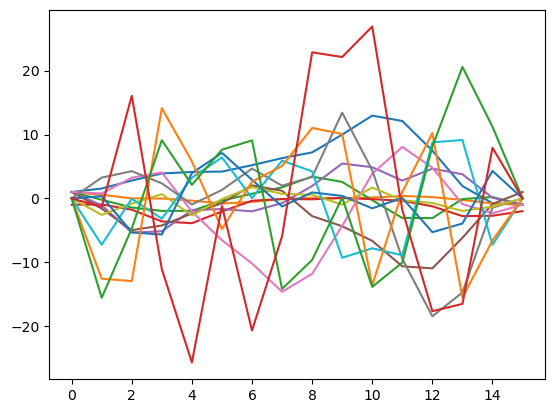

In [20]:
plt.plot(_opti.results['x'])